# Metehan Ayhan - Clustering (Kümeleme)

### Clustering: Veriyi benzerliklerine göre kümelendirme

In [3]:
import pandas as pd
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('cars.xls')

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [7]:
#Hatırlatma:
#Regression r2 RMSE
#Classification Accuracy, FI Score Classification Report and confusion Matrix
#Clustersing silhouette score (yüksek olmasına gerek yok)

In [8]:
x=df[['Price', 'Mileage', 'Cylinder']]

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [11]:
model=KMeans(4)
model=model.fit(x)

In [12]:
tahmin=model.predict(x)

In [13]:
x['cluster']=tahmin

In [14]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [15]:
silhouette_score(x,tahmin)

0.41393977474176685

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'fiyat')

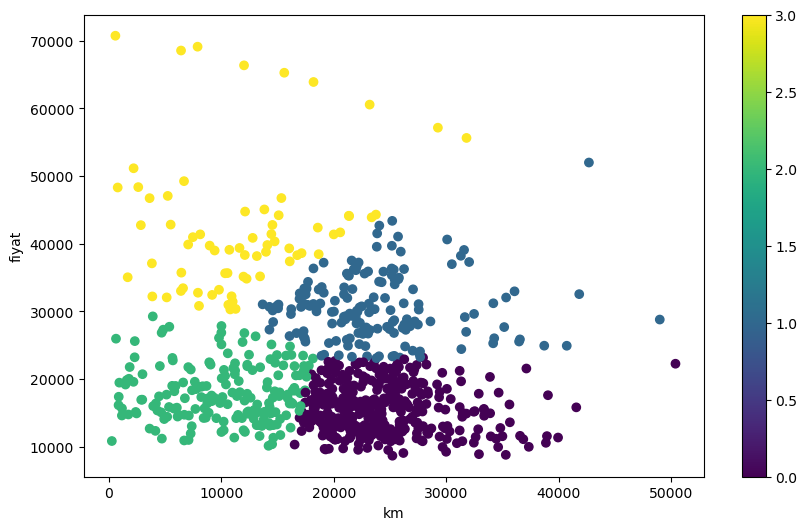

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.colorbar()
plt.xlabel("km")
plt.ylabel("fiyat")

Text(0, 0.5, 'Fiyat')

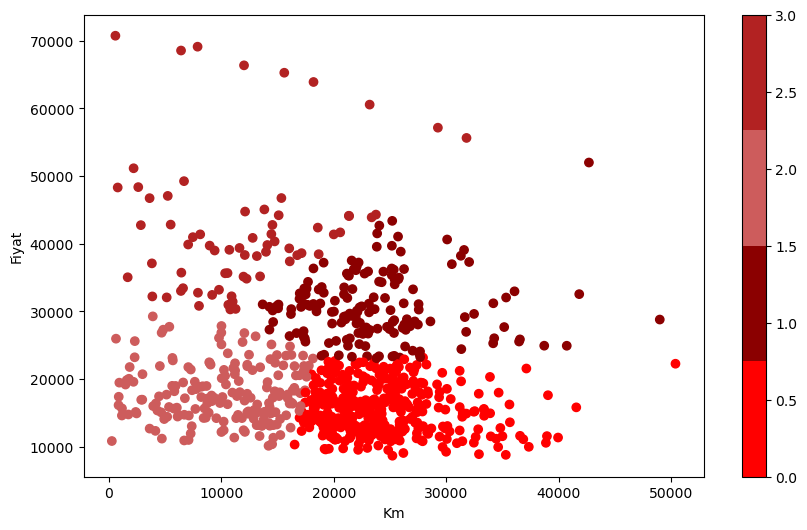

In [18]:
import numpy as np
from matplotlib.colors import ListedColormap
renkler = ['red', 'darkred', 'indianred', 'firebrick']
cmap = ListedColormap(renkler)
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=tahmin, cmap=cmap)
plt.colorbar();
plt.xlabel("Km")
plt.ylabel("Fiyat")

In [19]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.4515070148327876
0.40339248035468217
0.3379689696650331
0.36659472759307254
0.34395199771647955
0.3689735786125471
0.3366341852062587
0.3659163422728686


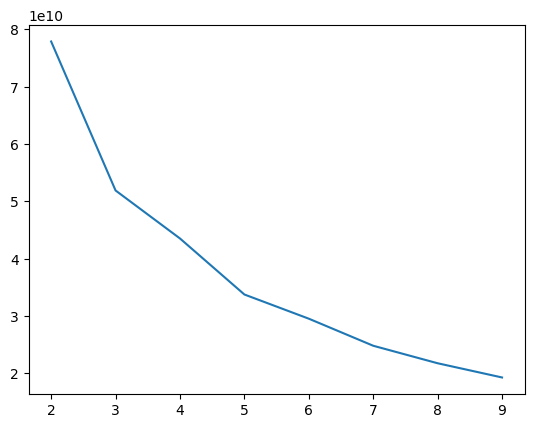

In [20]:
plt.plot(range(2,10),wcss)

<Axes: >

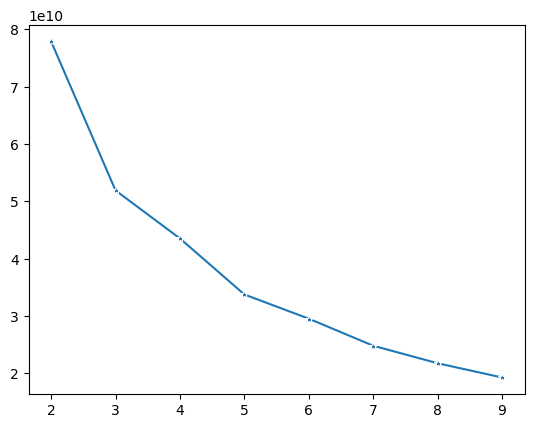

In [21]:
import seaborn as sns
sns.lineplot(x=range(2, 10),y= wcss, marker='*')

In [22]:
#pip install yellowbrick

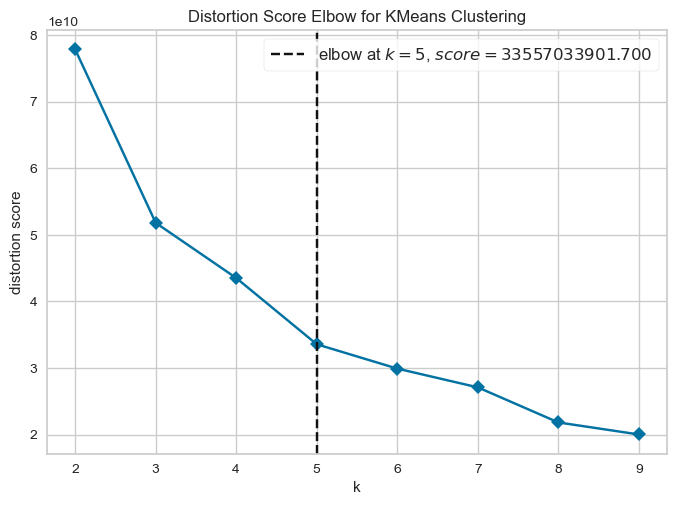

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(x)  
visualizer.show()

In [24]:
#Hierachical Clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
data=linkage(x, method='ward' ,metric= 'euclidean')

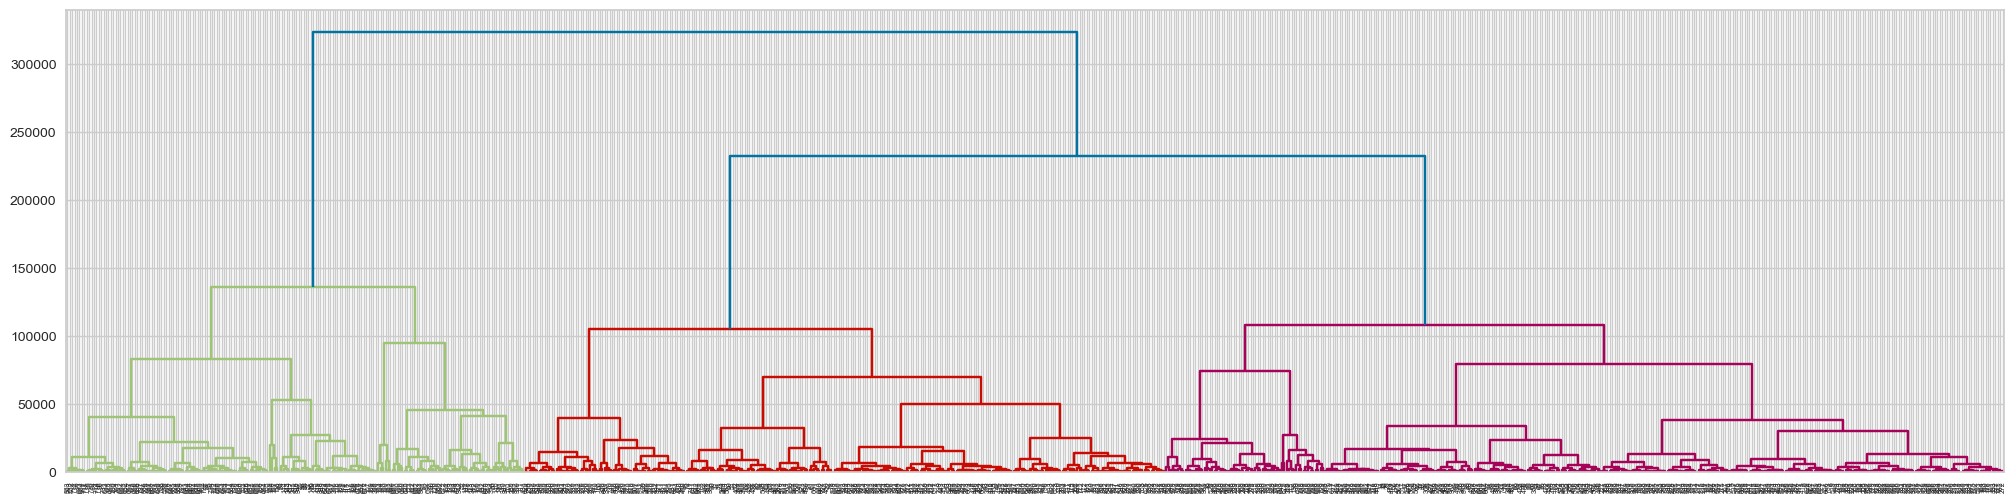

In [27]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [28]:
df=pd.read_csv('Billionaires.csv')

In [29]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

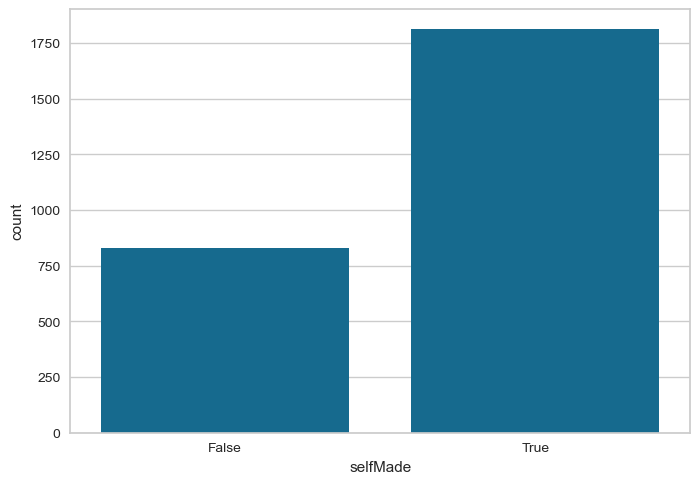

In [30]:
sns.countplot( x=df['selfMade' ] )

<Axes: xlabel='count', ylabel='country'>

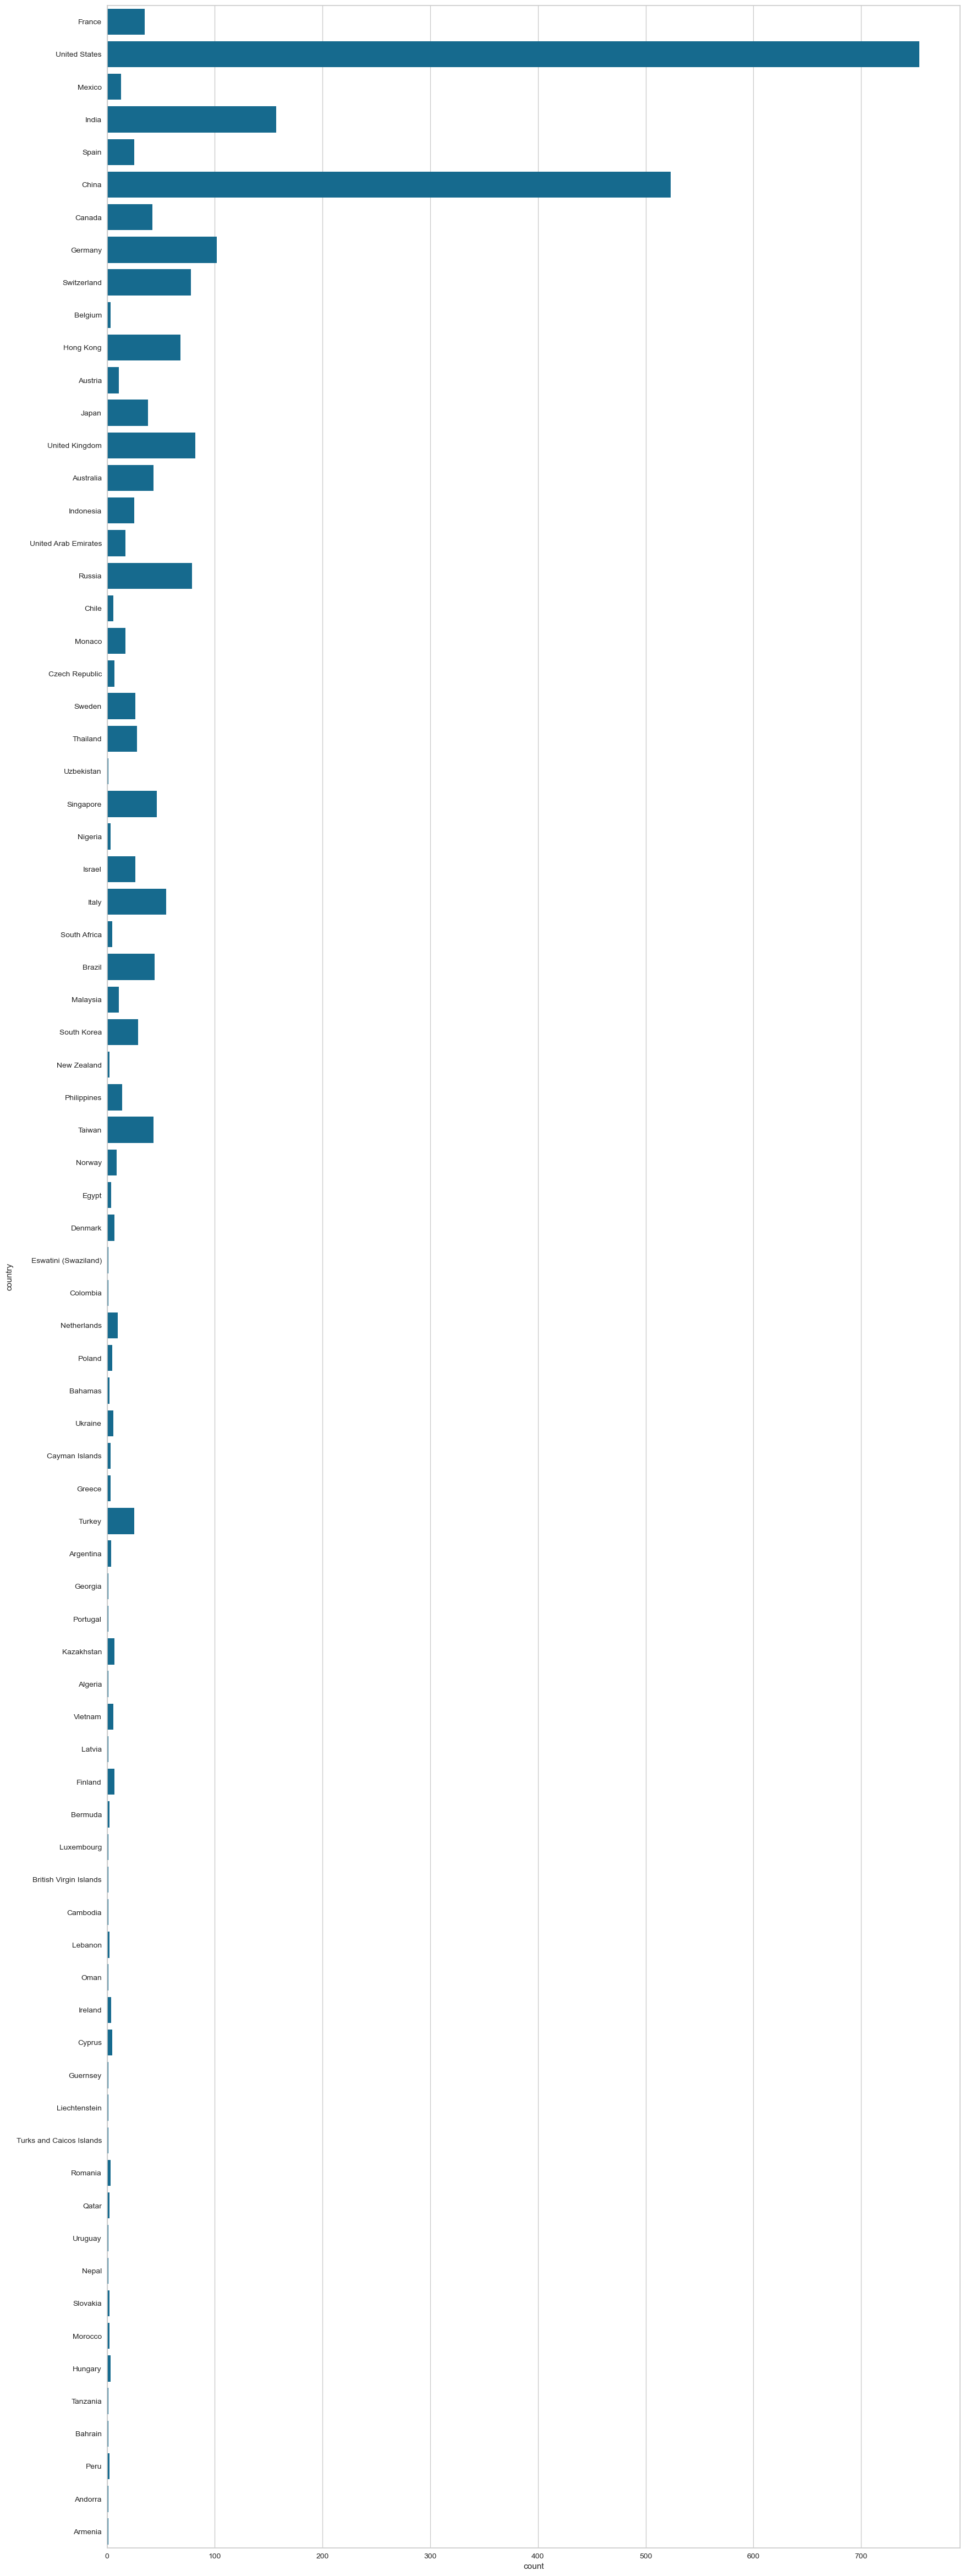

In [31]:
plt.figure(figsize=(20,60))
sns.countplot( y=df['country' ] )

<Axes: xlabel='count', ylabel='country'>

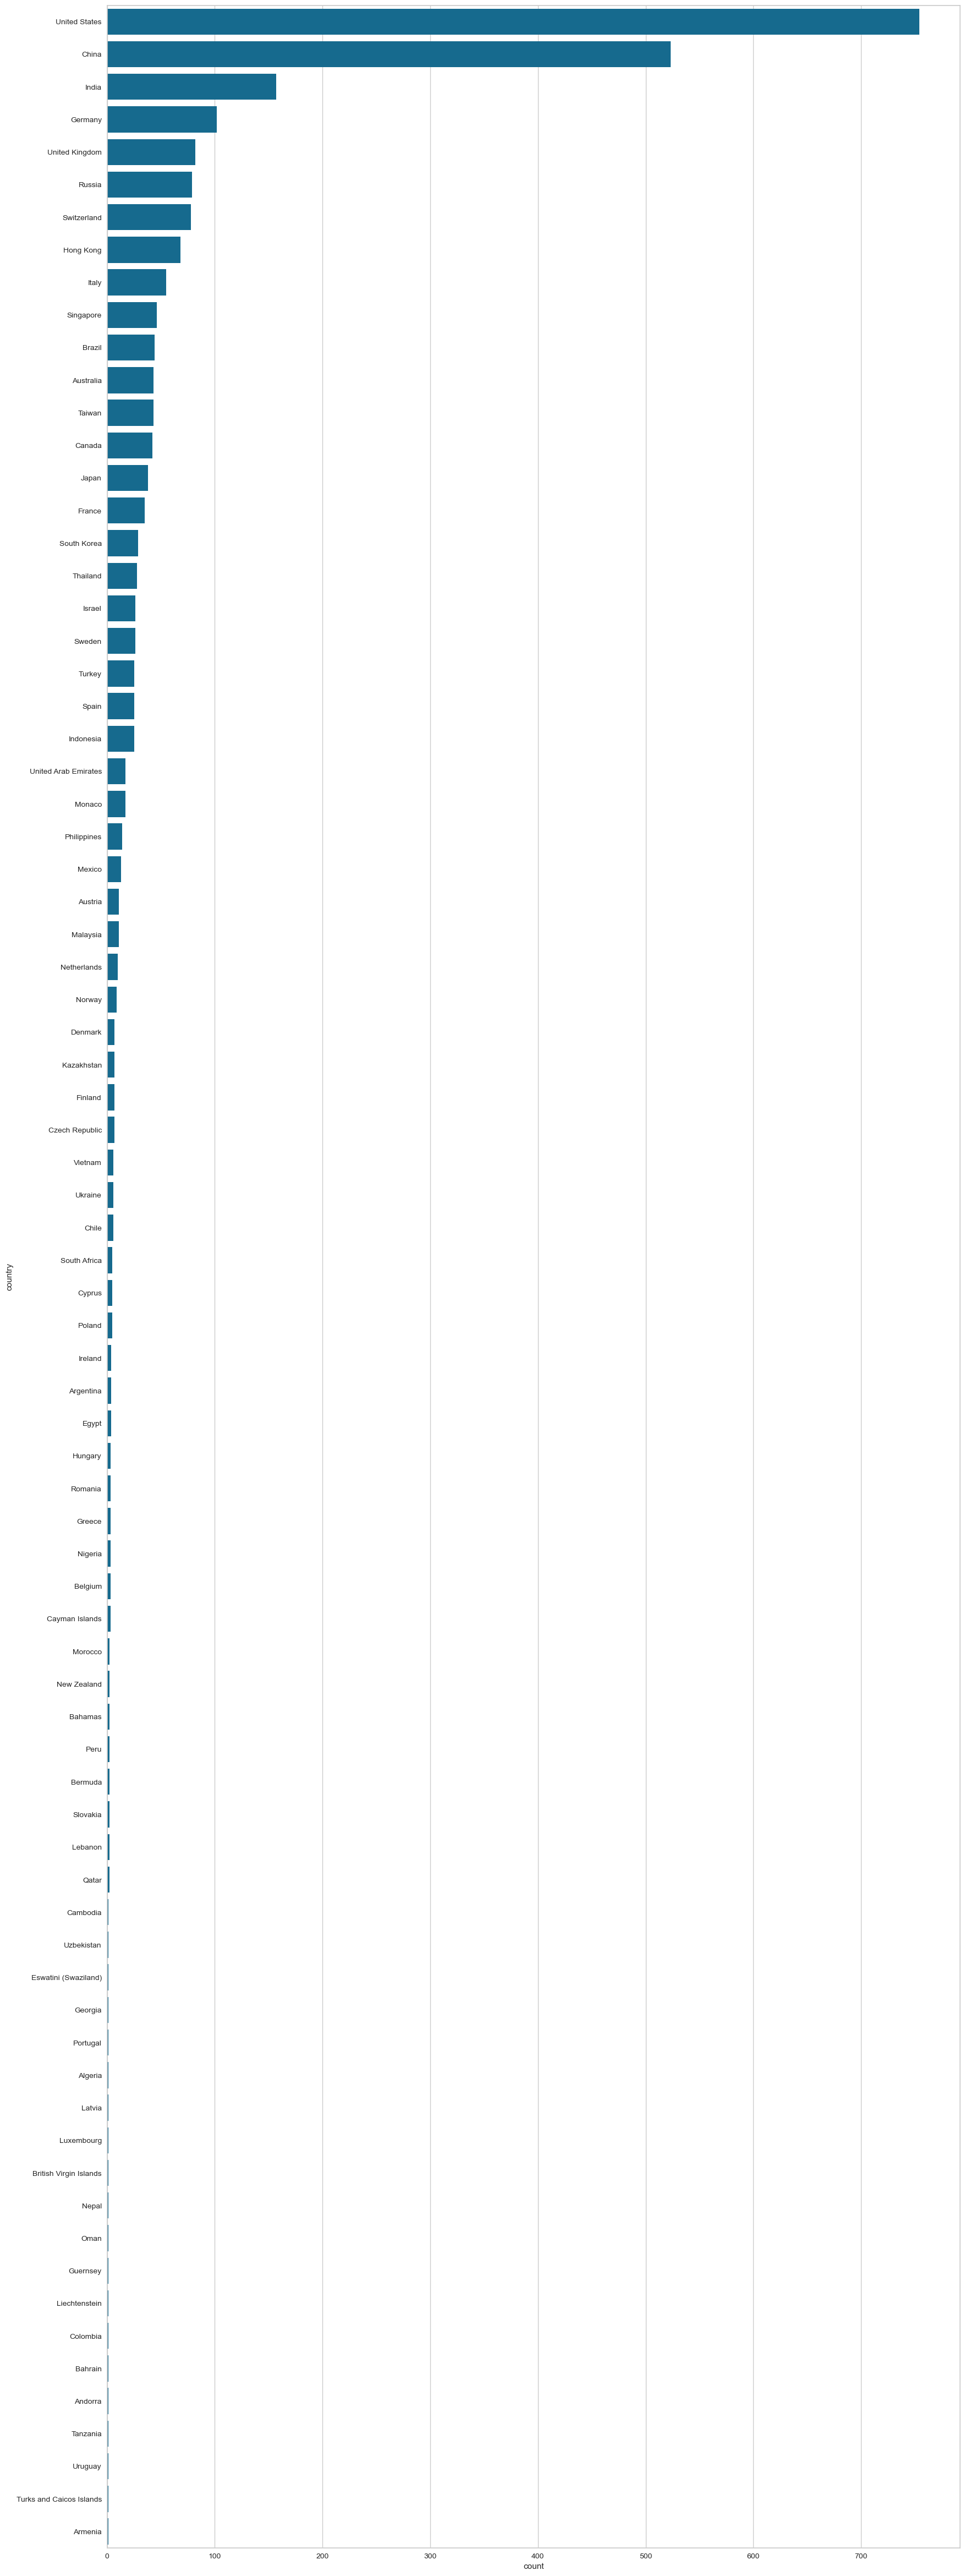

In [32]:
ydf=df['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot( y=df['country'],order=ydf.index )

In [33]:
df[df[ 'country']== 'Turkey' ]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
498,497,5300,Manufacturing,Ibrahim Erdemoglu,60.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,NaN,True,U,M,9/26/1962 0:00,Erdemoglu,Ibrahim,NaN,4/4/2023 5:01,NaN,NaN,1962.0,9.0,26.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
548,534,5000,Food & Beverage,Murat Ulker,64.0,Turkey,Istanbul,Food,Food & Beverage,Turkey,NaN,False,U,M,3/23/1959 0:00,Ulker,Murat,NaN,4/4/2023 5:01,NaN,NaN,1959.0,3.0,23.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
582,580,4700,Manufacturing,Ali Erdemoglu,63.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,NaN,True,U,M,11/20/1959 0:00,Erdemoglu,Ali,NaN,4/4/2023 5:01,NaN,NaN,1959.0,11.0,20.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
982,982,3000,Diversified,Semahat Sevim Arsel,94.0,Turkey,Istanbul,Diversified,Diversified,Turkey,NaN,False,U,F,9/8/1928 0:00,Arsel,Semahat Sevim,NaN,4/4/2023 5:01,NaN,NaN,1928.0,9.0,8.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1042,1027,2900,Diversified,Ipek Kirac,38.0,Turkey,Istanbul,Diversified,Diversified,Turkey,NaN,False,U,F,11/28/1984 0:00,Kirac,Ipek,NaN,4/4/2023 5:01,NaN,NaN,1984.0,11.0,28.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1128,1104,2700,Diversified,Mustafa Rahmi Koc,92.0,Turkey,Istanbul,Diversified,Diversified,Turkey,NaN,False,U,M,10/9/1930 0:00,Koc,Mustafa Rahmi,NaN,4/4/2023 5:01,NaN,NaN,1930.0,10.0,9.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1242,1217,2500,Energy,Saban Cemil Kazanci,62.0,Turkey,Istanbul,Energy,Energy,Turkey,NaN,False,R,M,2/13/1961 0:00,Kazanci,Saban Cemil,NaN,4/4/2023 5:01,NaN,NaN,1961.0,2.0,13.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1256,1217,2500,Diversified,Ferit Faik Sahenk,59.0,Turkey,Istanbul,Diversified,Diversified,Turkey,NaN,False,U,M,3/18/1964 0:00,Sahenk,Ferit Faik,NaN,4/4/2023 5:01,NaN,NaN,1964.0,3.0,18.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1326,1312,2300,Construction & Engineering,Erman Ilicak,55.0,Turkey,Ankara,Construction,Construction & Engineering,Turkey,NaN,True,E,M,10/3/1967 0:00,Ilicak,Erman,NaN,4/4/2023 5:01,NaN,NaN,1967.0,10.0,3.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1349,1312,2300,Diversified,Filiz Sahenk,56.0,Turkey,Istanbul,Diversified,Diversified,Turkey,NaN,False,U,F,2/14/1967 0:00,Sahenk,Filiz,NaN,4/4/2023 5:01,NaN,NaN,1967.0,2.0,14.0,234.44,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322


In [34]:
tr=df[df['country']=='Turkey']

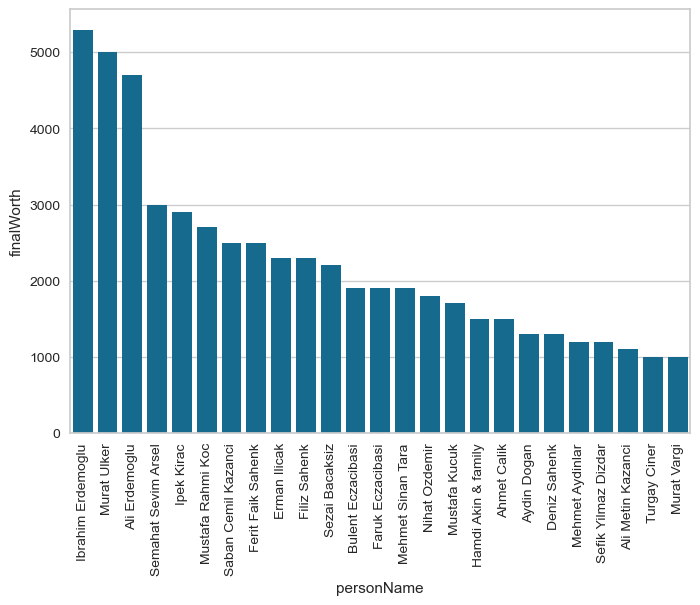

In [35]:
sns.barplot(x=tr['personName'],y=tr['finalWorth'])
plt.xticks(rotation=90);

<Axes: xlabel='selfMade', ylabel='count'>

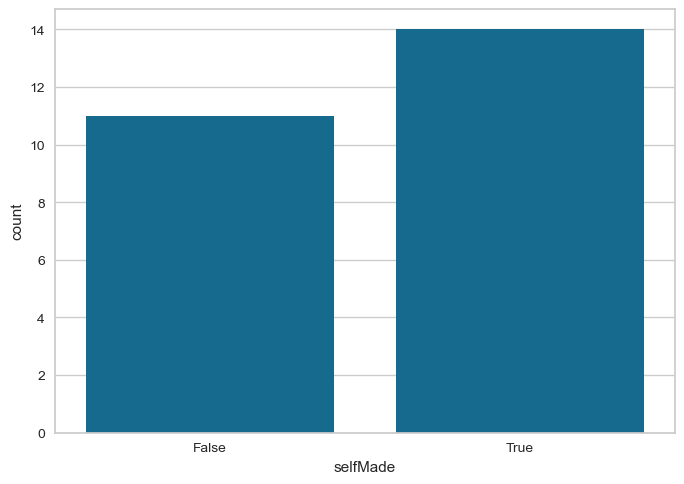

In [36]:
sns.countplot(x=tr['selfMade'])

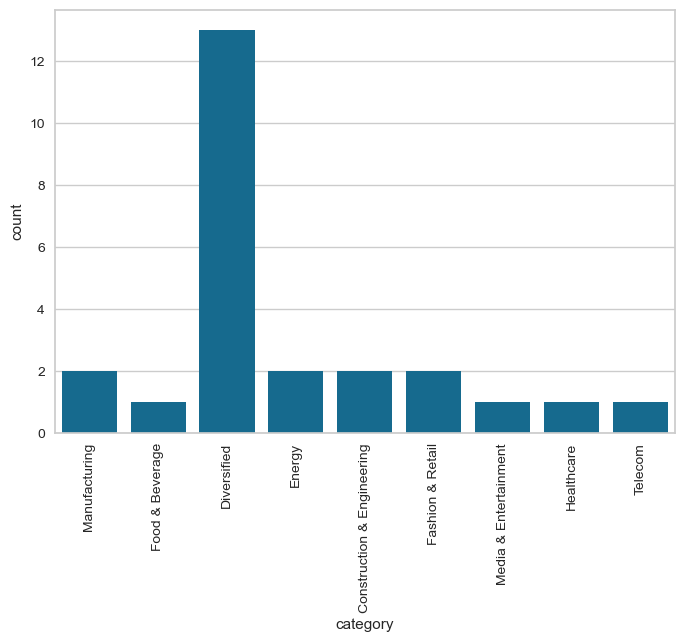

In [37]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90)
plt.show()

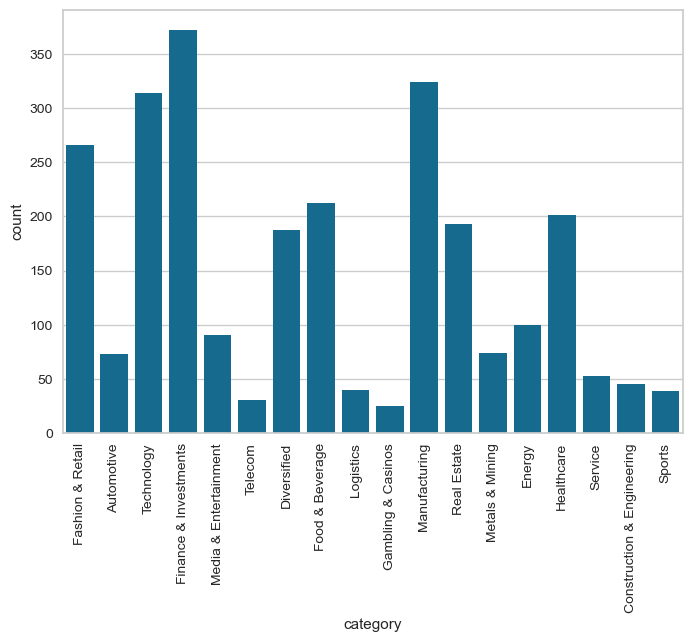

In [38]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show()

In [39]:
tr['gender'].value_counts(normalize=True)

gender
M    0.84
F    0.16
Name: proportion, dtype: float64